<a href="https://colab.research.google.com/github/janmlew/amarket/blob/main/DC_project_Android_App_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uwaga! Kod poniżej to jedno z ćwiczeń DataCamp (edytowane via [Spyder](https://www.spyder-ide.org/)).

Total number of apps in the dataset  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1   

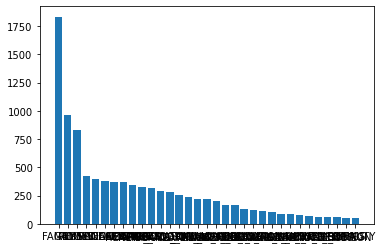

4.173243045387994


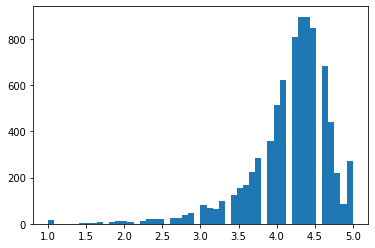

      Unnamed: 0                                App   Category  Rating  \
3327        4197             most expensive app (H)     FAMILY     4.3   
3465        4362                         💎 I'm rich  LIFESTYLE     3.8   
3469        4367           I'm Rich - Trump Edition  LIFESTYLE     3.6   
4396        5351                          I am rich  LIFESTYLE     3.8   
4398        5354                     I am Rich Plus     FAMILY     4.0   
4399        5355                      I am rich VIP  LIFESTYLE     3.8   
4400        5356                  I Am Rich Premium    FINANCE     4.1   
4401        5357                I am extremely Rich  LIFESTYLE     2.9   
4402        5358                         I am Rich!    FINANCE     3.8   
4403        5359                 I am rich(premium)    FINANCE     3.5   
4406        5362                      I Am Rich Pro     FAMILY     4.4   
4408        5364     I am rich (Most expensive app)    FINANCE     4.1   
4410        5366                      

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

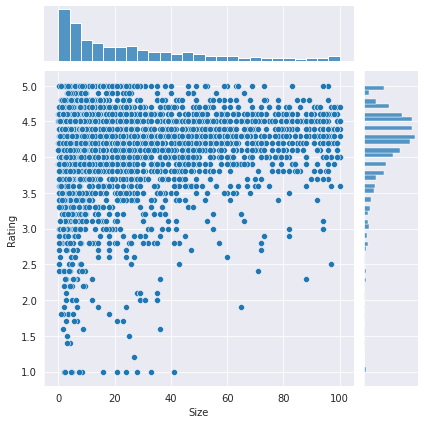

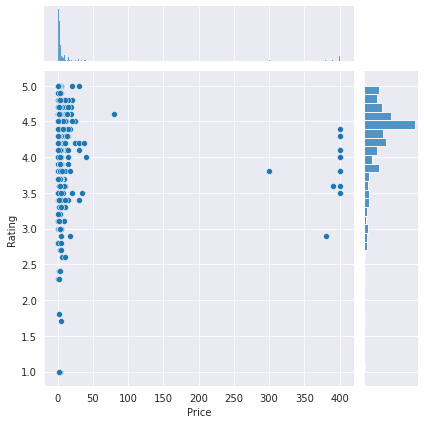

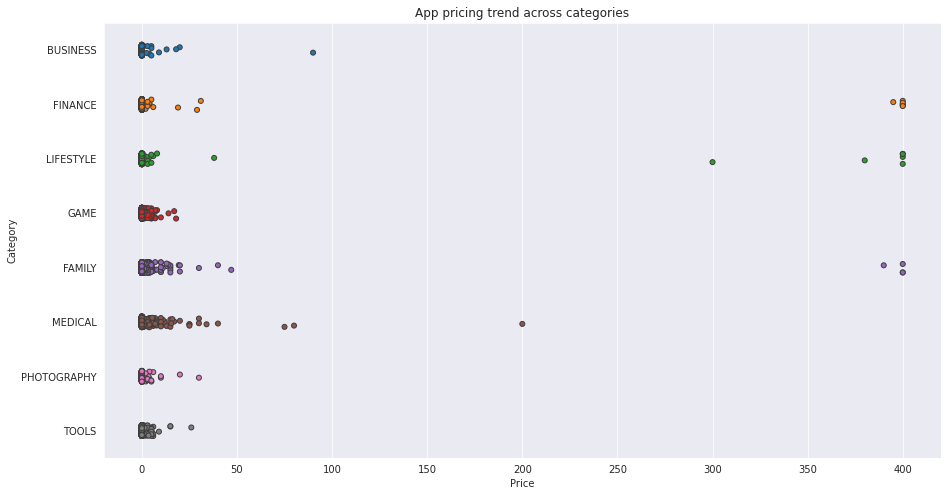

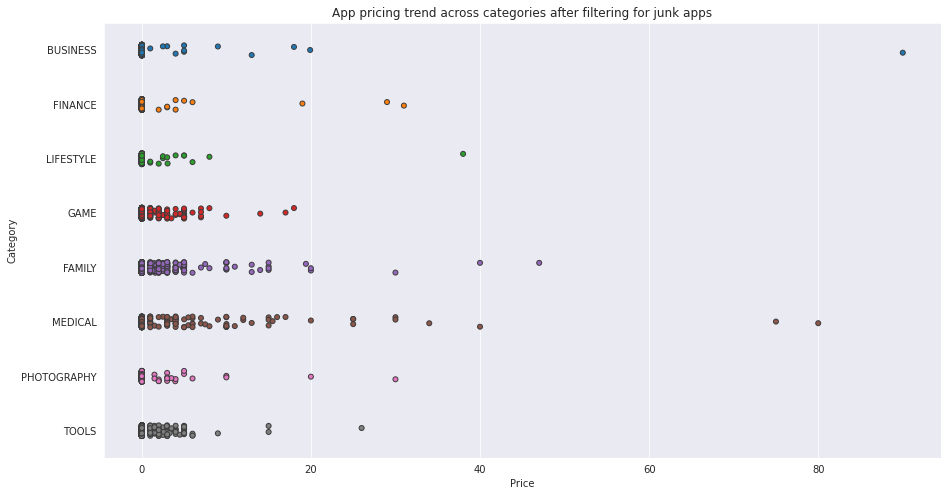

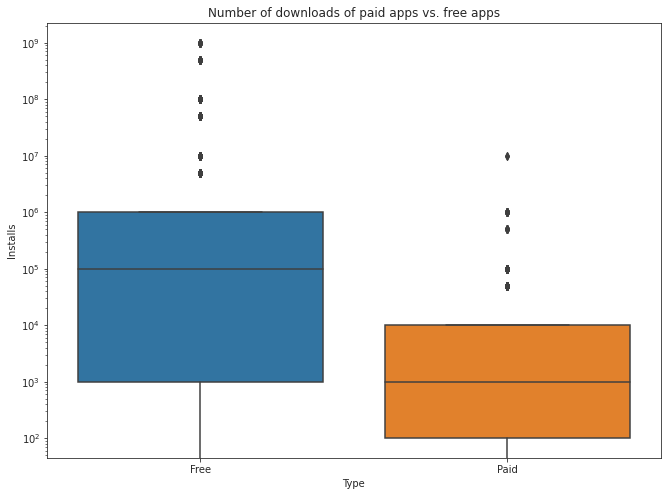

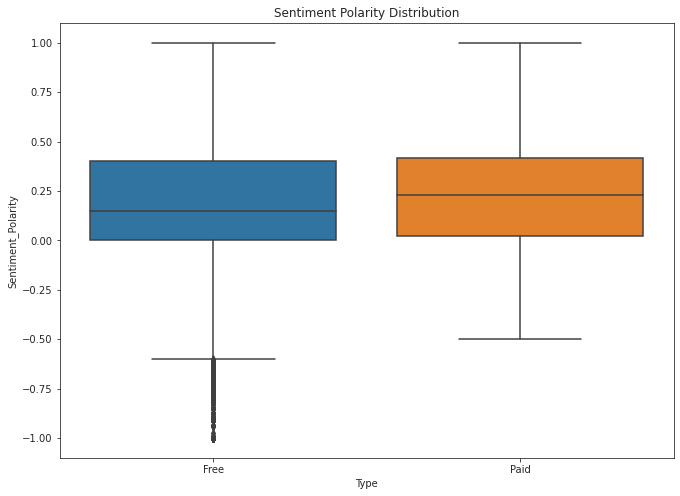

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import numpy as np

PATH = '/content/drive/MyDrive/Colab Notebooks/Project/datasets'
apps = pd.read_csv(PATH+'/apps.csv').drop_duplicates()

print('Total number of apps in the dataset ', str(apps['App'].count()))
print(apps.head())

chars_to_remove = ['+','$',',']
cols_to_clean = ['Installs', 'Price']

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

#apps['Installs'] = apps['Installs'].astype(float)
#apps['Price'] = apps['Price'].astype(float)
apps = apps.astype({'Installs':'float', 'Price':'float'})
print(apps.info())

#num_categories = np.unique(apps['Category'], return_counts=True)
num_categories = len(apps['Category'].unique())
num_apps_in_category= apps['Category'].value_counts()
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

plt.bar(num_apps_in_category.index, num_apps_in_category.values)
plt.show()

'''
data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values)]
plotly.offline.iplot(data)
'''

avg_app_rating = apps['Rating'].mean()

print(avg_app_rating)
plt.hist(x=apps['Rating'], bins=50)
plt.show()

'''
data = [go.Histogram(x = apps['Rating'])]
layout = {'shapes': [{
                    'type': 'line',
                    'x0': avg_app_rating,
                    'y0': 0,
                    'x1': avg_app_rating,
                    'x2': 1000,
                    'line': {'dash':'dashdot'}
                    }]
        }
plotly.offline.iplot({'data': data, 'layout': layout})
'''

#%matplotlib inline
#warnings.filterwarnings('ignore')

apps_with_size_and_rating_present = apps[apps['Rating'].notnull() & apps['Size'].notnull()]
large_categories = apps_with_size_and_rating_present.groupby('Category').filter \
                   (lambda x: len(x) >= 250)
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] \
                                              == 'Paid']

sns.set_style('darkgrid')
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL',
                                            'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]
apps_above_200 = apps[apps['Price'] > 200]
print(apps_above_200.head(20))

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'],
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'],
                   data=apps_under_100, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

'''
trace0 = go.Box(y = apps[apps['Type'] == 'Paid']['Installs'], name = 'Paid')
trace1 = go.Box(y = apps[apps['Type'] == 'Free']['Installs'], name = 'Free')
layout = go.Layout(title='Number of downloads of paid apps vs. free apps',
                   yaxis = dict(title='Log number of downloads', type='log',
                   autorange=True))
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})
To samo jest niżej! -->
'''
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = apps['Type'], y = apps['Installs'], data=apps)
ax.set_yscale('log')
ax.set_title('Number of downloads of paid apps vs. free apps')

reviews_df = pd.read_csv(PATH+'/user_reviews.csv')
merged_df = apps.merge(reviews_df)
merged_df = merged_df.dropna(subset=['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data=merged_df)
ax.set_title('Sentiment Polarity Distribution')